In [16]:
%load_ext autoreload
%autoreload 2

import chess
import numpy as np
import matplotlib.pyplot as plt
from cam_chess import detect_checkerboard, adjust_perspective

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


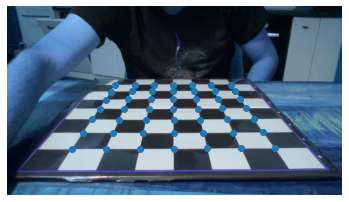

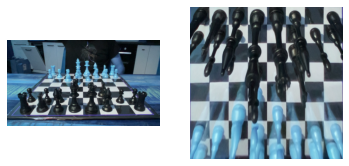

In [43]:
empty = np.load('img/empty_board.npy')
filled = np.load('img/filled_board.npy')

corners = detect_checkerboard(empty)
fig = adjust_perspective(filled, corners)

Now we can chop the image into NN inputs and assign them to the appropriate fields. For the parent class we will use [python-chess](https://python-chess.readthedocs.io/en/latest/index.html).

Let's end up with a dict that consists of a cell name as a key and image as a value.

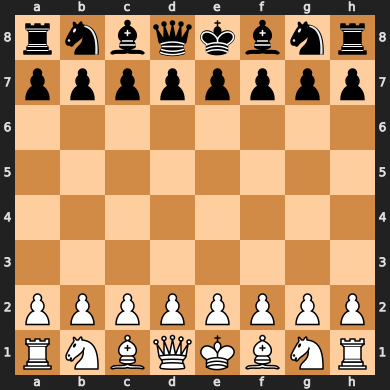

In [77]:
board = chess.Board()
board

In [78]:
squares = {chess.square_name(col + 8 * (7 - row)): fig[100*row:100*(row+1), 100*col:100*(col+1)]
           for col in range(8) for row in range(8)[::-1]}

Let's make sure that this produces correct mapping.

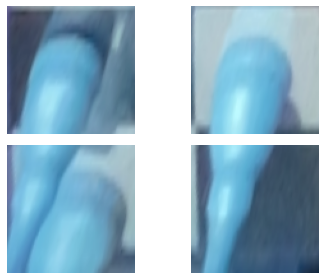

In [80]:
plt.subplot(221)
plt.imshow(squares['a2'])
plt.axis('off')
plt.subplot(222)
plt.imshow(squares['b2'])
plt.axis('off')
plt.subplot(223)
plt.imshow(squares['a1'])
plt.axis('off')
plt.subplot(224)
plt.imshow(squares['b1'])
plt.axis('off')
plt.tight_layout()
plt.show()